# HW2. Week3

손지우

## 1. 데이터 전처리 및 시각화

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1-1. 데이터 가져오기

In [146]:
wine = pd.read_csv('Wine.csv', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [147]:
#colnames들이 다 숫자라서 보기 싫으니까 원래 feature 이름으로 바꿔주자
wine.columns = ['class', 'alcohol', 'malicAcid', 'ash', 'ashAlcalinity', 'magnesium', 'totalPhenols', 'flavanoids', 'nonflavanoidPhenols',
'proanthocyanins', 'colorIntensity', 'hue', 'od280_od315', 'proline']
wine.head(3)

,class,alcohol,malicAcid,ash,ashAlcalinity,magnesium,totalPhenols,flavanoids,nonflavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [148]:
wine.describe()

,class,alcohol,malicAcid,ash,ashAlcalinity,magnesium,totalPhenols,flavanoids,nonflavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


첫번째 칼럼은 1,2,3 중 하나로, Wine class label을 지시한다. 즉, 이것이 곧 타겟변수가 될 것이다.

In [149]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                  178 non-null int64
alcohol                178 non-null float64
malicAcid              178 non-null float64
ash                    178 non-null float64
ashAlcalinity          178 non-null float64
magnesium              178 non-null int64
totalPhenols           178 non-null float64
flavanoids             178 non-null float64
nonflavanoidPhenols    178 non-null float64
proanthocyanins        178 non-null float64
colorIntensity         178 non-null float64
hue                    178 non-null float64
od280_od315            178 non-null float64
proline                178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### 1-2. 결측치 확인

In [150]:
wine.isnull().sum()

class                  0
alcohol                0
malicAcid              0
ash                    0
ashAlcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonflavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

결측치는 하나도 없다.

### 1-3. 상관관계 확인

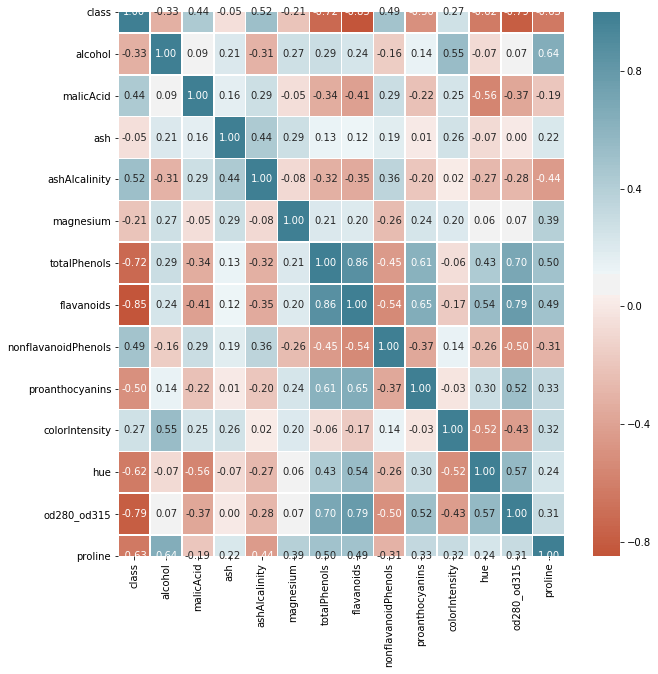

In [151]:
plt.figure(figsize=(10,10))
sns.heatmap(data = wine.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

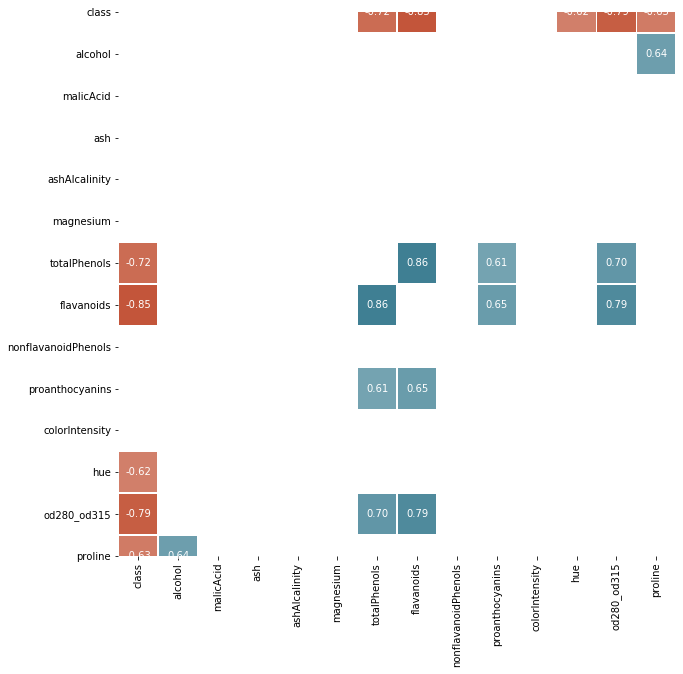

In [152]:
#색깔이 직관적으로 와닿지 않으니, 상관계수의 절대값이 0.6인 것들만 남기자! (0.6는 그냥 내 마음대로...)
plt.figure(figsize=(10,10))
sns.heatmap(data = wine.corr()[(np.abs(wine.corr()) > 0.6) & (wine.corr()!=1)],
            annot=True, fmt = '.2f', linewidths=.5, cmap=sns.diverging_palette(20, 220, n=200), cbar=False)
plt.show()

class와 상관관계가 가장 있어보이는 두 feature를 고르겠다.

==> flavnoids, od280_od315

## 2. Train-Test split

Test에 다음의 모델을 fit해보기
LDA / GDA
Logistic Regression
Logistic Regression with feature expansion (kcv로 차수결정)
각 모델에 대해 Test MSE 보고하고 결과 해석하기

[Kaggle 사이트](https://www.kaggle.com/abhikaggle8/wine-classification) 참고하기

In [185]:
X = wine[['flavanoids', 'od280_od315']]
y = wine['class']

In [351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=422)

In [352]:
print(X_train.shape)
print(X_test.shape)

(124, 2)
(54, 2)


## 2-1. LDA

In [353]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [354]:
clf1 = LinearDiscriminantAnalysis()
clf1.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

flava = X.iloc[:,0]
od = X.iloc[:,1]

In [355]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [356]:
train = pd.concat([y_train, X_train], axis=1)
test = pd.concat([y_test, X_test], axis=1)

In [357]:
train.head()

,class,flavanoids,od280_od315
77,2,1.32,2.52
11,1,2.43,2.82
57,1,3.23,2.84
98,2,3.75,2.77
36,1,2.68,2.78


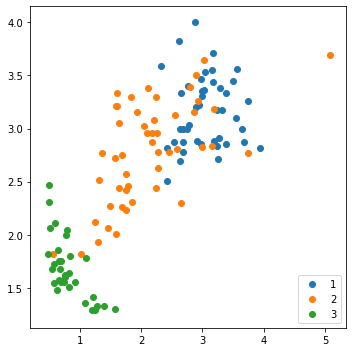

In [358]:
plt.figure(figsize=(5,5))
for i in np.sort(train['class'].unique()):
    plt.scatter(data=train[train['class']==i], x='flavanoids', y='od280_od315', label=i)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

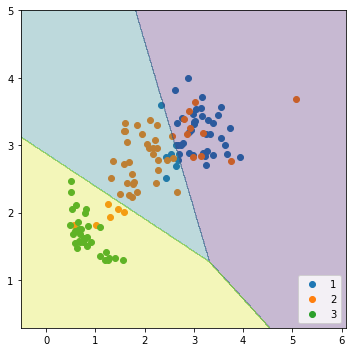

In [359]:
plt.figure(figsize=(5,5))
for i in np.sort(train['class'].unique()):
    plt.scatter(data=train[train['class']==i], x='flavanoids', y='od280_od315', label=i)
plt.legend(loc='lower right')

grid_size = 500
A, B = np.meshgrid(np.linspace(train['flavanoids'].min()-1, train['flavanoids'].max()+1, grid_size),
                   np.linspace(train['od280_od315'].min()-1, train['od280_od315'].max()+1, grid_size))
C = clf1.predict(np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)])).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3)

plt.tight_layout()
plt.show()

## 2-2. QDA

In [360]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [361]:
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X_train, y_train)

C:\Users\bunga\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

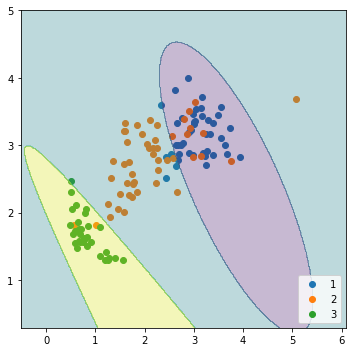

In [362]:
plt.figure(figsize=(5,5))
for i in np.sort(train['class'].unique()):
    plt.scatter(data=train[train['class']==i], x='flavanoids', y='od280_od315', label=i)
plt.legend(loc='lower right')

grid_size = 500
A, B = np.meshgrid(np.linspace(train['flavanoids'].min()-1, train['flavanoids'].max()+1, grid_size),
                   np.linspace(train['od280_od315'].min()-1, train['od280_od315'].max()+1, grid_size))
C = clf2.predict(np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)])).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3)

plt.tight_layout()
plt.show()

## 2-3. Logistic Regression

In [363]:
from sklearn.linear_model import LogisticRegression

In [364]:
clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

C:\Users\bunga\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

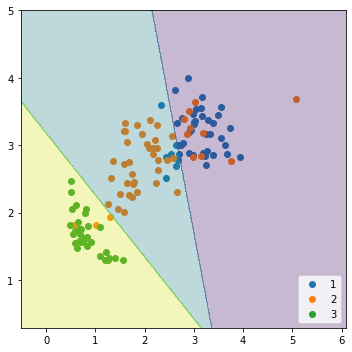

In [365]:
plt.figure(figsize=(5,5))
for i in np.sort(train['class'].unique()):
    plt.scatter(data=train[train['class']==i], x='flavanoids', y='od280_od315', label=i)
plt.legend(loc='lower right')

grid_size = 500
A, B = np.meshgrid(np.linspace(train['flavanoids'].min()-1, train['flavanoids'].max()+1, grid_size),
                   np.linspace(train['od280_od315'].min()-1, train['od280_od315'].max()+1, grid_size))
C = clf3.predict(np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)])).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3)

plt.tight_layout()
plt.show()

아래는 [Kaggle사이트](https://www.kaggle.com/abdeljalil/wine-basic-classification-with-96-accuracy) 그대로 가져온거...

In [366]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
estimator = LogisticRegression(solver='liblinear', multi_class='auto')
selector = RFECV(estimator, step=1, cv = StratifiedKFold(10));
selector.fit(X, y## 2-4. Logistic Regression with feature expansion (kcv로 차수 결정));
plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation Score')
grid_scores = plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_, zorder = 3);
best_number = plt.scatter(selector.n_features_, np.max(selector.grid_scores_), color='red', zorder = 5);
plt.legend([best_number],['Optimal Number of Features'], loc='lower right');

SyntaxError: invalid syntax (<ipython-input-366-4ed5ee3af4b0>, line 8)

모든 feature 선택되었을 때 CV score가 제일 높으므로, 모든 변수를 다 채택한다.

## 2-4. Logistic Regression with feature expansion (kcv로 차수 결정)

PASS~ (다른 사람들이 한 거 봐야겠다)

In [367]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

for i in range(1,4):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly.fit_transform(X_train)
    log = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto')
    kcv_score = cross_val_score(log, X_poly, y_train.values.ravel(), cv=5) 
    print('kcv_score when degree =',i, ':', round(kcv_score.mean(),3))

kcv_score when degree = 1 : 0.831
kcv_score when degree = 2 : 0.847
kcv_score when degree = 3 : 0.823


In [368]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly_train = poly.fit_transform(X_train)
clf4 = LogisticRegression()
clf4.fit(X_poly_train, y_train)

C:\Users\bunga\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bunga\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

poly는 어떻게 시각화해야 하는지 모르겠다....

## 2-5. Test score 계산

In [369]:
print('LDA\'s Test score:', round(clf1.score(X_test, y_test.values.ravel()),4), '\n'
      'QDA\'s Test score:', round(clf2.score(X_test, y_test.values.ravel()),4), '\n'
      'Logistic Regression\'s Test score:', round(clf3.score(X_test, y_test.values.ravel()),4))

LDA's Test score: 0.8519 
QDA's Test score: 0.8333 
Logistic Regression's Test score: 0.8148


#### LDA > QDA > Logistic Regression

-----------------

아래는 [Kaggle사이트](https://www.kaggle.com/abdeljalil/wine-basic-classification-with-96-accuracy)를 그대로 가져온거..
나중에 따로 이해해봐야지...

In [59]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [60]:
classifiers = []
classifiers.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='auto')))
classifiers.append(('Support Vector Classifier', SVC(kernel='linear')))
classifiers.append(('GaussianNB', GaussianNB()))
classifiers.append(('K-Nearest Neighbors',KNeighborsClassifier(n_neighbors=3)))
classifiers.append(('Decision Tree', DecisionTreeClassifier()))
classifiers.append(('Multi-Layer Perceptron', MLPClassifier(hidden_layer_sizes=(15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
classifiers.append(('eXtreme Gradient Boosting', XGBClassifier()))

C:\Users\bunga\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


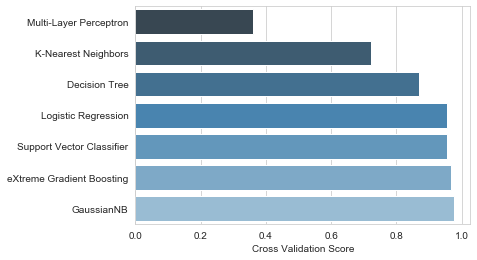

In [64]:
kfold = StratifiedKFold(n_splits=10, random_state=2)
cv_results = []
for name, classifier in classifiers:
    result = cross_val_score(classifier, X, y, cv=kfold);
    cv_results.append((name, result));
results = pd.DataFrame(cv_results, columns=['classifier','cvscore'])
results['cvscore'] = [np.mean(i) for i in results['cvscore']]
sns.set_style('whitegrid')
ax = sns.barplot(x='cvscore',y='classifier', data=results.sort_values('cvscore'), palette='Blues_d')
ax.set(xlabel='Cross Validation Score', ylabel='');

In [65]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [67]:
print('The best performing model is: %s\nWith Cross-Validation Score of: %.2f' % (results.iloc[results['cvscore'].idxmax()][0], results.iloc[results['cvscore'].idxmax()][1]))

The best performing model is: GaussianNB
With Cross-Validation Score of: 0.98
